In [50]:
from math import degrees
from statistics import linear_regression

import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import polynomial

In [51]:
np.random.seed(233)
x = np.random.uniform(-4, 2, size=100)
y = x**2 + 4 * x + 3 + np.random.randn(100)
X = x.reshape(-1, 1)

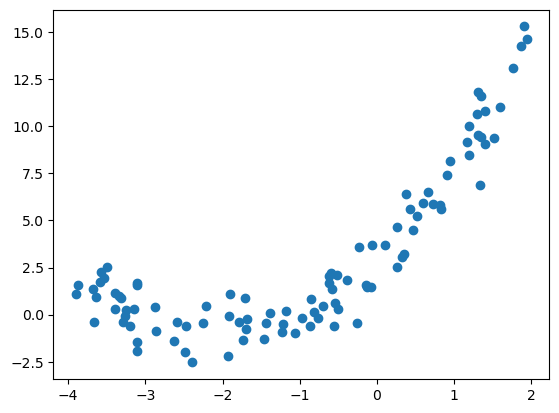

In [52]:
plt.scatter(x, y)
plt.show()

### 1. Underfitting

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline, Pipeline

In [54]:
linear_reg = LinearRegression()
model = linear_reg.fit(X, y)

In [55]:
y_pred = model.predict(X)

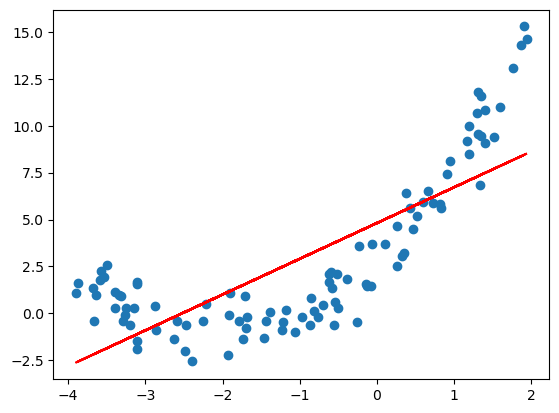

In [56]:
plt.scatter(x, y)
plt.plot(x, y_pred, color='r')
plt.show()

In [57]:
linear_reg.score(X, y)

0.6028175347745822

In [58]:
### 2. Overfitting

In [59]:
polynomial_features = PolynomialFeatures(degree=2)
X_poly = polynomial_features.fit_transform(X)

In [60]:
linear_reg = LinearRegression()
model = linear_reg.fit(X_poly, y)

In [61]:
y_pred = model.predict(X_poly)

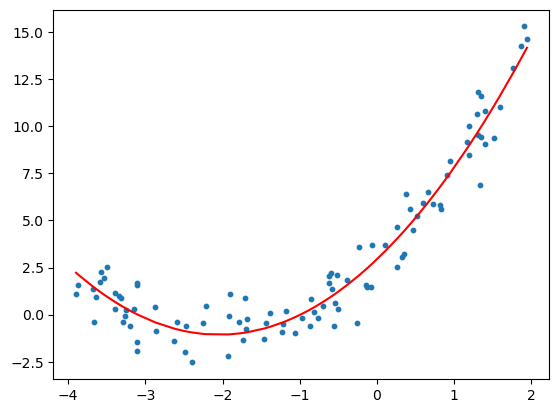

In [62]:
plt.scatter(x, y, s = 10)
plt.plot(np.sort(x), y_pred[np.argsort(x)], color='r')
plt.show()

In [63]:
linear_reg.score(X_poly, y)

0.9415982435154331

### or

In [64]:
pipe_reg = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
model = pipe_reg.fit(X, y)

In [65]:
y_pred = model.predict(X)

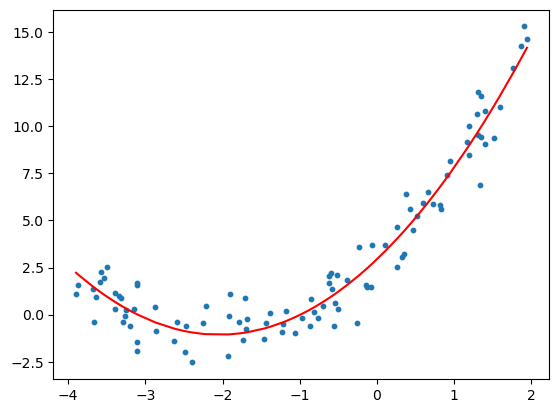

In [66]:
plt.scatter(x, y, s = 10)
plt.plot(np.sort(x), y_pred[np.argsort(x)], color='r')
plt.show()

In [67]:
pipe_reg.score(X, y)

0.9415982435154331

### 3. Just Right

In [68]:
X_new = np.linspace(-5, 3, 200).reshape(-1, 1)
X_new_poly = polynomial_features.fit_transform(X_new)
y_pred = linear_reg.predict(X_new_poly)

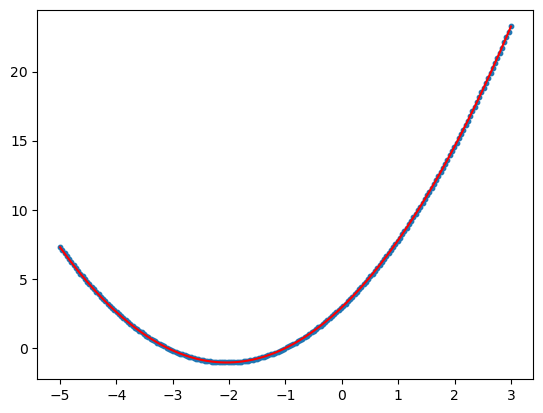

In [69]:
plt.scatter(X_new, y_pred, s = 10)
plt.plot(X_new, y_pred, color='r')
plt.show()

In [70]:
model.score(X_new, y_pred)

1.0

Degree: 2, Score: 0.9415982435154331
Degree: 5, Score: 0.9433204910903277
Degree: 10, Score: 0.9465320087145428
Degree: 15, Score: 0.9496924989263819
Degree: 20, Score: 0.9529861663099737
Degree: 24, Score: 0.9531561076049637


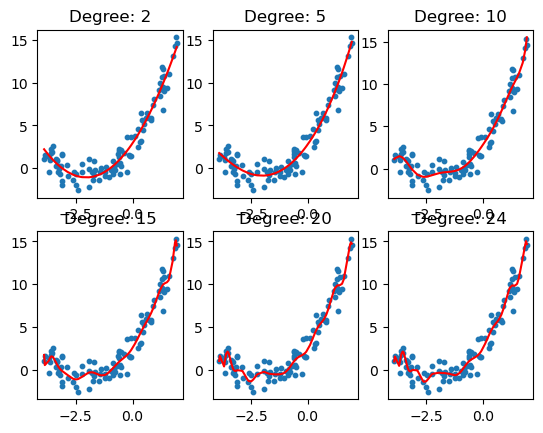

In [71]:
degrees = [2, 5, 10, 15, 20, 24]
for i, degree in enumerate(degrees):
    polynomial_features = PolynomialFeatures(degree=degree)
    X_poly = polynomial_features.fit_transform(X)
    linear_reg = LinearRegression()
    model = linear_reg.fit(X_poly, y)
    y_pred = model.predict(X_poly)
    plt.subplot(2, 3, i+1)
    plt.scatter(x, y, s = 10)
    plt.plot(np.sort(x), y_pred[np.argsort(x)], color='r')
    plt.title(f'Degree: {degree}')
    print(f'Degree: {degree}, Score: {model.score(X_poly, y)}')
plt.show()